# Importando bibliotecas

In [4]:
import pandas as pd
import numpy as np
import random

dataset = pd.read_csv('Aulas/houses_to_rent_v3.csv')
dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,0,0,1,240,3,3,4,-,acept,furnished,0,8000,NaN,121,9121
1,1,1,1,0,64,2,1,1,10,acept,not furnished,540,820,122.0,11,1493
2,2,2,2,1,443,5,5,4,3,acept,furnished,4172,7000,NaN,89,12680


# Fazendo um boxplot com os dados

<AxesSubplot:>

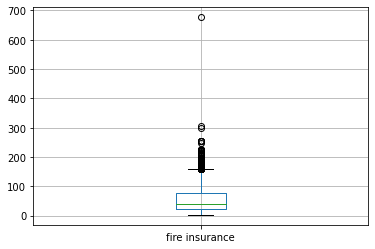

In [6]:
dataset.boxplot(column=['fire insurance'], return_type="axes")

# IMportando stats do scipy

<AxesSubplot:>

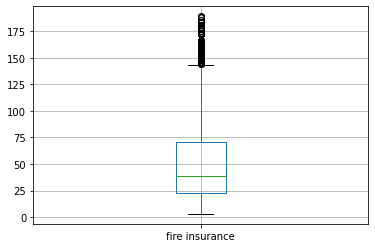

In [10]:
from scipy import stats

#calcula o z-score para a coluna fire insurance e cria uma nova coluna para armazenar o resultado
dataset['fire insurance_zscore'] = np.abs(stats.zscore(dataset['fire insurance']))

#percorre o dataset removendo as linhas onde o z score calculado é maior que 3
for index,item in dataset.iterrows():
    if(item['fire insurance_zscore'] > 3):
        dataset.drop(labels=[index], axis = 0, inplace=True)
        
#remove a coluna com o z score
dataset.drop(labels=['fire insurance_zscore'], axis=1, inplace=True)
dataset.boxplot(column = ['fire insurance'], return_type='axes')

# Lendo o dataset novamente

In [12]:
dataset = pd.read_csv('Aulas/houses_to_rent_v3.csv')
dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,0,0,1,240,3,3,4,-,acept,furnished,0,8000,NaN,121,9121
1,1,1,1,0,64,2,1,1,10,acept,not furnished,540,820,122.0,11,1493
2,2,2,2,1,443,5,5,4,3,acept,furnished,4172,7000,NaN,89,12680


# Criando os quantis

54.0


<AxesSubplot:>

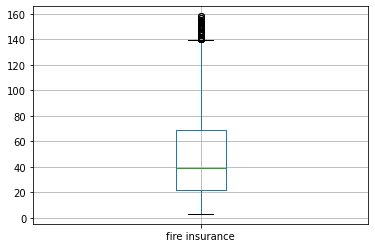

In [17]:
Q1 = dataset['fire insurance'].quantile(0.25)
Q3 = dataset['fire insurance'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)
#percorre o dataset removendo as linhas onde o z score calculado é maior que 3
for index, item in dataset.iterrows():
    if((item['fire insurance'] < (Q1 - 1.5*IQR)) or (item['fire insurance'] > (Q3 + 1.5*IQR))):
        dataset.drop(labels=[index], axis=0, inplace= True)
        
#plota o boxplot
dataset.boxplot(column=['fire insurance'], return_type='axes')